<a href="https://colab.research.google.com/github/yevintheenura01/DL_Assignment/blob/Dinushi/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [27]:
# Load dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
print(df.head())



   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [28]:
print("Dataset shape:", df.shape)



Dataset shape: (100000, 9)


In [29]:
print(df.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [30]:
print("Column names:", df.columns.tolist())

Column names: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [31]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [32]:
print("\nClass balance:\n", df['diabetes'].value_counts(normalize=True))


Class balance:
 diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [33]:
display(df.describe())# Summary stats for numerical columns

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


/tmp/ipython-input-855954515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


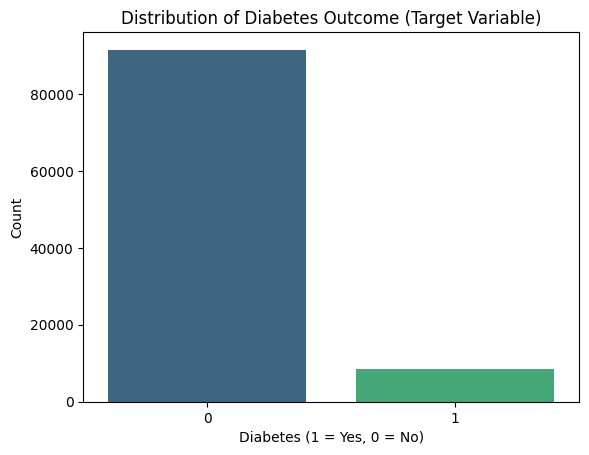

In [34]:

# Count of diabetic (1) vs non-diabetic (0)
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcome (Target Variable)')
plt.xlabel('Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [35]:
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 3854


In [36]:
# Remove duplicates
df = df.drop_duplicates()
print("New Shape:", df.shape)

New Shape: (96146, 9)


In [38]:
#  (Enhanced) - Data Preprocessing
# =======================================
# 1️⃣ Handle missing values
# =======================================
print("Before cleaning, missing values:")
print(df.isna().sum())

Before cleaning, missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [39]:
# Replace missing BMI values with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [40]:
# =======================================
# 2️⃣ Encode categorical variables
# =======================================
from sklearn.preprocessing import LabelEncoder

df_prep = df.copy()

In [41]:
# Encode 'gender' using LabelEncoder
le_gender = LabelEncoder()
df_prep['gender'] = le_gender.fit_transform(df_prep['gender'])


In [42]:
# Handle 'smoking_history' - replace 'No Info' with 'unknown'
df_prep['smoking_history'] = df_prep['smoking_history'].replace('No Info', 'unknown')
df_prep = pd.get_dummies(df_prep, columns=['smoking_history'], drop_first=True)

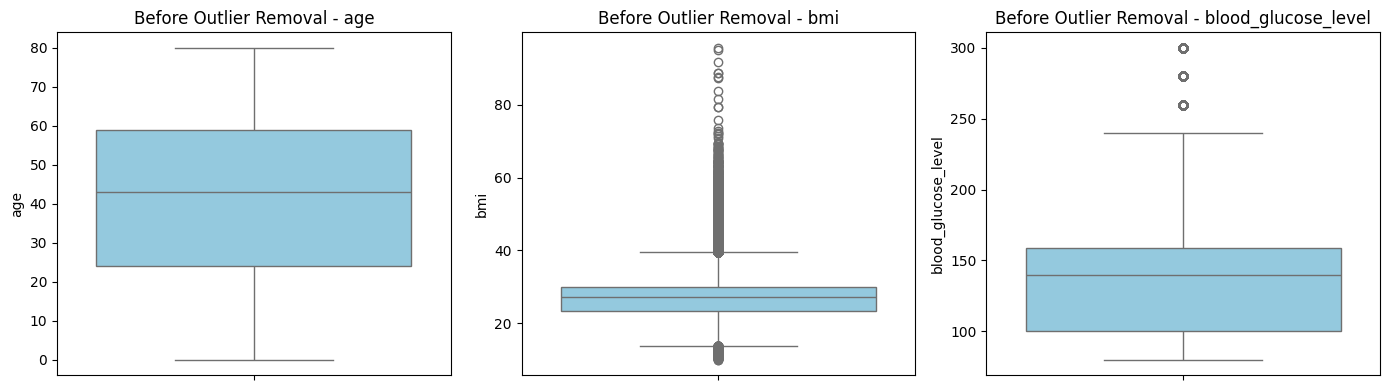

In [43]:
# =======================================
# Visualize distributions before outlier removal
# =======================================
numeric_cols = ['age', 'bmi', 'blood_glucose_level']

plt.figure(figsize=(14,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_prep[col], color='skyblue')
    plt.title(f"Before Outlier Removal - {col}")
plt.tight_layout()
plt.show()


In [44]:
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from imblearn.over_sampling import SMOTE
from collections import Counter

In [45]:
# =======================================
# Outlier Detection (Z-score method)
# =======================================
z_scores = np.abs(stats.zscore(df_prep[numeric_cols]))
filtered_entries = (z_scores < 3).all(axis=1)
df_prep = df_prep[filtered_entries]

print("After outlier removal, dataset shape:", df_prep.shape)

After outlier removal, dataset shape: (93597, 13)


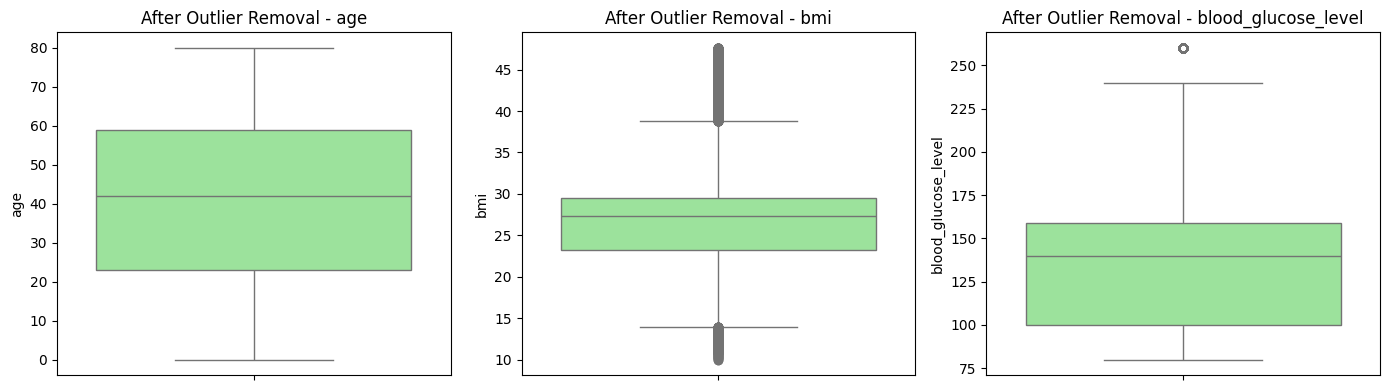

In [46]:
# Visualize after outlier removal
plt.figure(figsize=(14,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_prep[col], color='lightgreen')
    plt.title(f"After Outlier Removal - {col}")
plt.tight_layout()
plt.show()

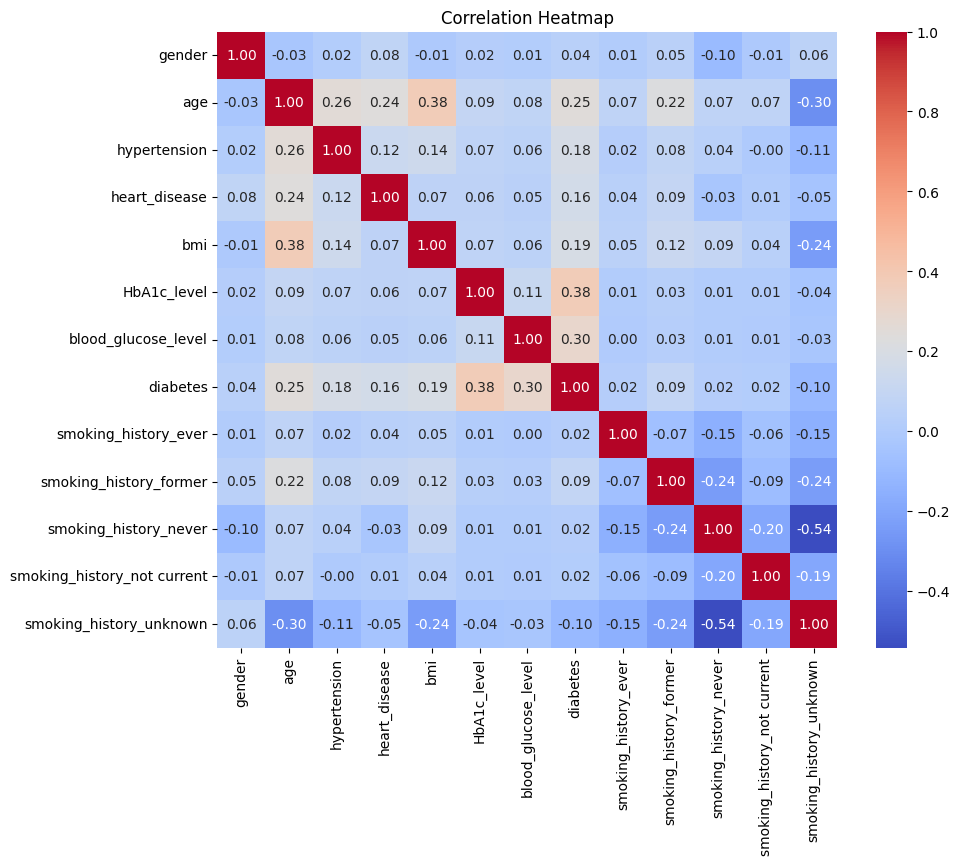

In [47]:
# =======================================
# Correlation Heatmap (Before Feature Selection)
# =======================================
plt.figure(figsize=(10,8))
sns.heatmap(df_prep.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [49]:
# Calculate mutual information
X_temp = df_prep.drop('diabetes', axis=1)
y_temp = df_prep['diabetes']
mi = mutual_info_classif(X_temp, y_temp, random_state=42)
mi_df = pd.DataFrame({'Feature': X_temp.columns, 'Mutual_Info': mi})
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)
print("\nMutual Information Scores:\n", mi_df)


Mutual Information Scores:
                         Feature  Mutual_Info
5                   HbA1c_level     0.118137
6           blood_glucose_level     0.079431
1                           age     0.037823
4                           bmi     0.020252
2                  hypertension     0.012627
11      smoking_history_unknown     0.012069
3                 heart_disease     0.009268
0                        gender     0.008630
9         smoking_history_never     0.008546
8        smoking_history_former     0.003166
10  smoking_history_not current     0.001855
7          smoking_history_ever     0.001277


/tmp/ipython-input-3838770992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Info', y='Feature', data=mi_df, palette='viridis')


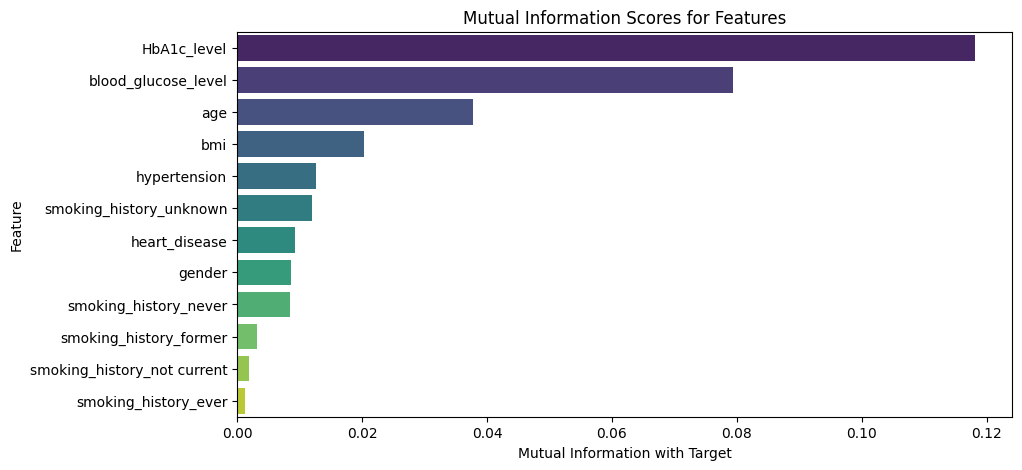

In [50]:
# Bar chart of MI scores
plt.figure(figsize=(10,5))
sns.barplot(x='Mutual_Info', y='Feature', data=mi_df, palette='viridis')
plt.title("Mutual Information Scores for Features")
plt.xlabel("Mutual Information with Target")
plt.ylabel("Feature")
plt.show()

In [51]:
# Drop features with very low MI (<0.01)
low_mi_features = mi_df[mi_df['Mutual_Info'] < 0.01]['Feature'].tolist()
df_prep = df_prep.drop(columns=low_mi_features)
print("Dropped low-importance features:", low_mi_features)

Dropped low-importance features: ['heart_disease', 'gender', 'smoking_history_never', 'smoking_history_former', 'smoking_history_not current', 'smoking_history_ever']


In [52]:
# =======================================
# Train–Test Split
# =======================================
X = df_prep.drop('diabetes', axis=1)
y = df_prep['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
# =======================================
# Feature Scaling
# =======================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class balance before SMOTE: Counter({0: 69438, 1: 5439})


/tmp/ipython-input-4078916628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='pastel')


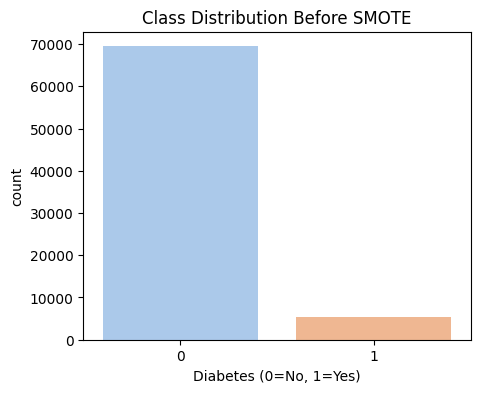

Class balance after SMOTE: Counter({0: 69438, 1: 69438})


/tmp/ipython-input-4078916628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette='muted')


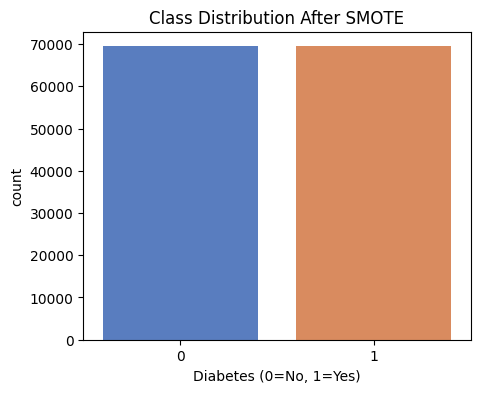

In [55]:
# =======================================
#  Class Balancing using SMOTE
# =======================================
print("\nClass balance before SMOTE:", Counter(y_train))
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette='pastel')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.show()

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Class balance after SMOTE:", Counter(y_train_bal))
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_bal, palette='muted')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.show()


In [56]:
# =======================================
# Final Info
# =======================================
print("\nFinal Dataset Shapes:")
print("X_train_bal:", X_train_bal.shape)
print("y_train_bal:", y_train_bal.shape)
print("X_test:", X_test_scaled.shape)
print("y_test:", y_test.shape)


Final Dataset Shapes:
X_train_bal: (138876, 6)
y_train_bal: (138876,)
X_test: (18720, 6)
y_test: (18720,)
